###### Problem Statement

The objective is to develop an intelligent Crop Recommendation System that suggests the most suitable crops for a given set of soil and environmental factors, with the aim of streamlining decision-making, increasing crop yields, and promoting sustainable farming practices.

##### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

##### Data Preprocessing

In [3]:
#loading the data
data = pd.read_csv('AgriForesight.csv')

#printing the data
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

##### Feature Description

**N (Nitrogen):** This represents the level of nitrogen nutrient in the soil. Nitrogen is an essential element for plant growth and is a key component of chlorophyll, which is essential for photosynthesis.

**P (Phosphorus):** Phosphorus is another crucial nutrient for plants, involved in energy transfer and various metabolic processes. It plays a significant role in promoting root development and flowering.

**K (Potassium):** Potassium is essential for overall plant health. It helps regulate water movement in cells, supports enzyme activation, and is important for photosynthesis and disease resistance.

**Temperature(Celsius):** This is the measurement of how hot or cold the environment is. Different crops have different temperature preferences for optimal growth. Extremes in temperature can affect plant health and development.

**Humidity(Percentage):** Humidity refers to the amount of moisture present in the air. It can influence transpiration (water movement through plants), disease susceptibility, and overall plant health.

**pH:** pH measures the acidity or alkalinity of the soil. Different crops thrive in different pH ranges. pH affects nutrient availability in the soil, which in turn impacts plant growth.

**Rainfall(mm):** This is the amount of precipitation or rainwater received in a certain period. Rainfall is essential for providing water to plants. Too much or too little rainfall can affect crop growth and yield.

**Label:** This is the target variable you're trying to predict. It indicates the type of crop corresponding to the given set of features. For instance, in the provided dataset, the crops are labeled as "rice."

In [4]:
#shape of the data
data.shape

(2200, 8)

Data consists of 2200 observation with 8 columns.

In [5]:
#Data types of the features
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
#info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


###### Data Cleaning

In [7]:
#check for Standard null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No Standard Null values in the data

In [8]:
#check for Non Satndard null values
data['N'].unique()

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134], dtype=int64)

There are no Non standard null values in the Nitrogen feature

In [9]:
data['P'].unique()

array([ 42,  58,  55,  35,  37,  53,  54,  46,  56,  50,  48,  38,  45,
        40,  59,  41,  47,  49,  51,  57,  39,  43,  44,  60,  52,  36,
        72,  67,  73,  70,  62,  74,  66,  63,  71,  78,  80,  68,  65,
        77,  76,  79,  61,  64,  69,  75,  24,  18,  26,  27,  25,  21,
        30,  11,   5,  10,   7,  20,  22,  15,  23,   8,  16,  29,  17,
         6,  19,  13,   9,  14,  28,  94,  95,  92,  89,  88,  87,  85,
        86,  83,  91,  81,  84,  90,  82,  93,  33,  31,  34,  32, 130,
       144, 123, 125, 131, 140, 122, 134, 145, 139, 141, 138, 136, 132,
       133, 121, 126, 120, 142, 135, 129, 128, 137, 127, 124, 143,  12],
      dtype=int64)

There are no Non standard null values in the Phosphorus feature

In [10]:
data['K'].unique()

array([ 43,  41,  44,  40,  42,  38,  36,  37,  39,  35,  45,  16,  17,
        21,  20,  19,  25,  22,  15,  18,  23,  24,  77,  84,  85,  81,
        75,  79,  76,  83,  78,  80,  82,  46,  50,  53,  54,  49,  55,
        52,  47,  48,  51,  27,  31,  32,  34,  33,  30,  28,  29,  26,
       195, 204, 205, 196, 198, 197, 203, 201, 202, 199, 200,  12,  13,
         6,   9,  10,  14,   8,   7,   5,  11], dtype=int64)

There are no Non standard null values in the Potassium feature

In [11]:
data['temperature'].unique()

array([20.87974371, 21.77046169, 23.00445915, ..., 24.13179691,
       26.2724184 , 23.60301571])

There are no Non standard null values in the temperature feature

In [12]:
data['humidity'].unique()

array([82.00274423, 80.31964408, 82.3207629 , ..., 67.22512329,
       52.12739421, 60.39647474])

There are no Non standard null values in the humidity feature

In [13]:
data['ph'].unique()

array([6.50298529, 7.03809636, 7.84020714, ..., 6.36260785, 6.75879255,
       6.77983261])

There are no Non standard null values in the Ph feature

In [14]:
data['rainfall'].unique()

array([202.9355362, 226.6555374, 263.9642476, ..., 173.3228386,
       127.1752928, 140.9370415])

There are no Non standard null values in the rainfall feature

In [15]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

There are no Non standard null values in the label feature

##### Descriptive Stats

##### Measures of Central Tendency

In [16]:
data_num = data.select_dtypes(include=[int, float])
data_cat = data.select_dtypes(include=[object])

In [83]:
#mean of the data
data_num.mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [18]:
#median of the data
data_num.median()

N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
dtype: float64

In [84]:
#mode of the data (numerical features)
data_num.mode()

N     P     K  temperature   humidity        ph    rainfall
0     22.0  60.0  17.0     8.825675  14.258040  3.504752   20.211267
1     40.0   NaN   NaN     9.467960  14.273280  3.510404   20.360011
2      NaN   NaN   NaN     9.535586  14.280419  3.525366   20.390205
3      NaN   NaN   NaN     9.724458  14.323138  3.532009   20.490356
4      NaN   NaN   NaN     9.851243  14.338474  3.558823   20.661278
...    ...   ...   ...          ...        ...       ...         ...
2195   NaN   NaN   NaN    43.037143  99.658092  9.416003  291.298662
2196   NaN   NaN   NaN    43.080227  99.724010  9.459493  295.609449
2197   NaN   NaN   NaN    43.302049  99.846716  9.679241  295.924880
2198   NaN   NaN   NaN    43.360515  99.969060  9.926212  298.401847
2199   NaN   NaN   NaN    43.675493  99.981876  9.935091  298.560117

[2200 rows x 7 columns]

In [85]:
data_cat.mode()

label
0         apple
1        banana
2     blackgram
3      chickpea
4       coconut
5        coffee
6        cotton
7        grapes
8          jute
9   kidneybeans
10       lentil
11        maize
12        mango
13    mothbeans
14     mungbean
15    muskmelon
16       orange
17       papaya
18   pigeonpeas
19  pomegranate
20         rice
21   watermelon

##### Measures of Dispersion

In [86]:
data_num.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [87]:
#Range of the data
data_num.max() - data_num.min()

N              140.000000
P              140.000000
K              200.000000
temperature     34.849818
humidity        85.723836
ph               6.430338
rainfall       278.348850
dtype: float64

In [88]:
#standard deviation of the data
data_num.std()

N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64

In [24]:
#variance of the data
data_num.var()

N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64

##### Skweness

In [25]:
skewness = data_num.skew()
skewness

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

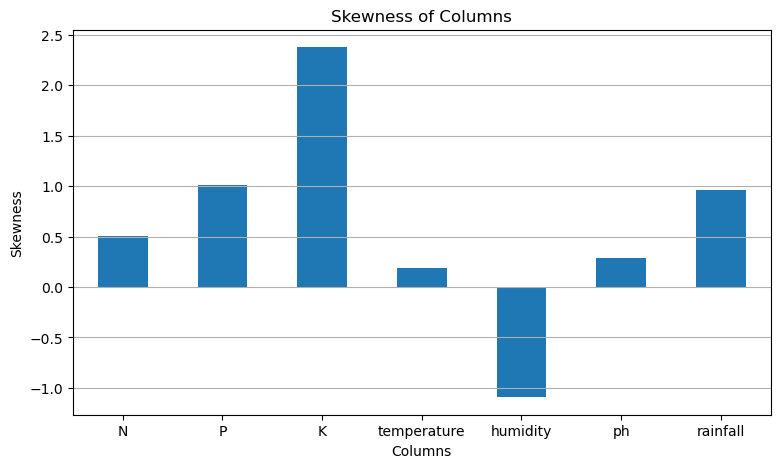

In [89]:
# Plotting the skewness values
plt.figure(figsize=(9, 5))
skewness.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

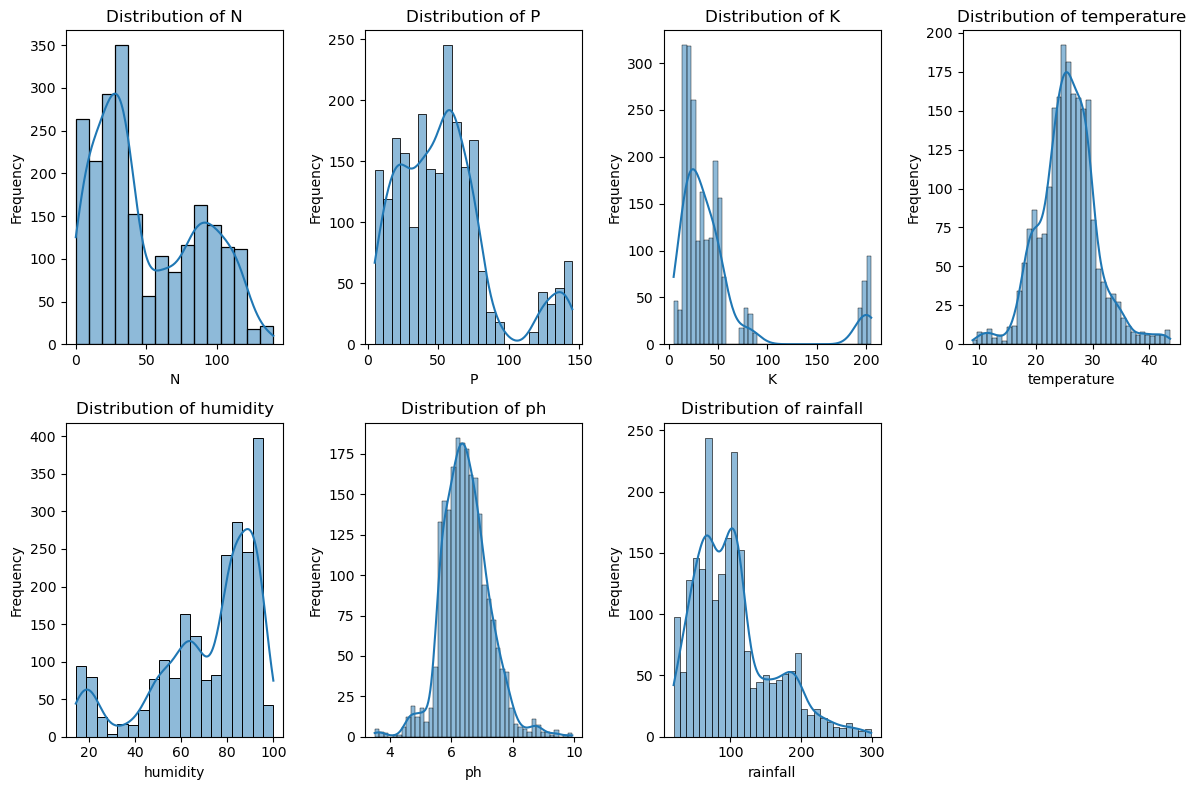

In [90]:
#Distribution plots
plt.figure(figsize=(12, 8))

# Loop through each numeric column and create distribution plots
for i, column in enumerate(data_num.columns):
    plt.subplot(2, 4, i+1)  # Create a subplot for each column (2 rows, 4 columns)
    sns.histplot(data_num[column], kde=True)  # Create the distribution plot with a kernel density estimate (KDE)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

##### Kurtosis

In [91]:
#Kurtosis
data_num.kurtosis()

N             -1.058240
P              0.860279
K              4.449354
temperature    1.232555
humidity       0.302134
ph             1.655581
rainfall       0.607079
dtype: float64

##### Exploratrory Data Analysis

##### Univariate Analysis

In [92]:
Label = pd.crosstab(index=data_cat['label'], columns='Frequency')
Label_1 = Label.sort_values(by='Frequency', ascending=False)
Label_1

col_0        Frequency
label                 
apple              100
banana             100
rice               100
pomegranate        100
pigeonpeas         100
papaya             100
orange             100
muskmelon          100
mungbean           100
mothbeans          100
mango              100
maize              100
lentil             100
kidneybeans        100
jute               100
grapes             100
cotton             100
coffee             100
coconut            100
chickpea           100
blackgram          100
watermelon         100

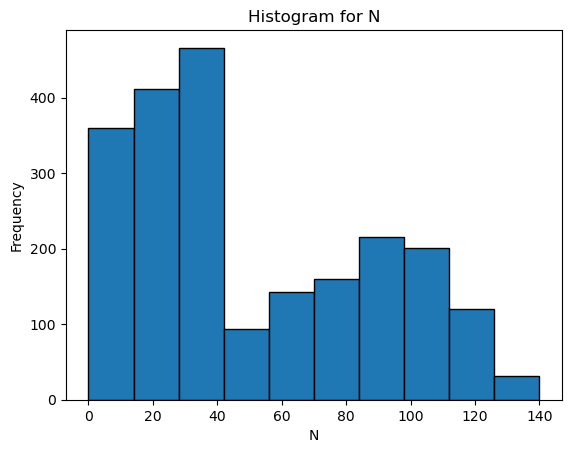

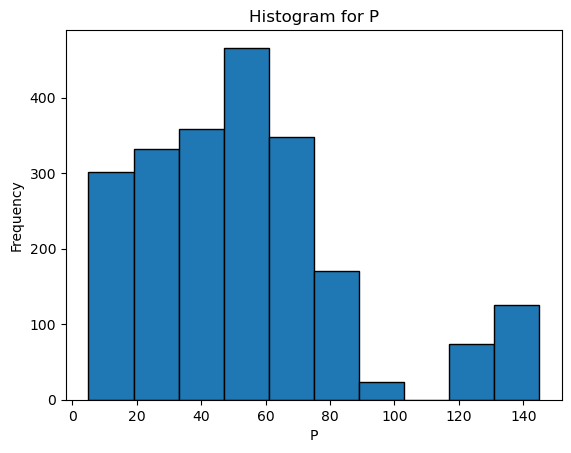

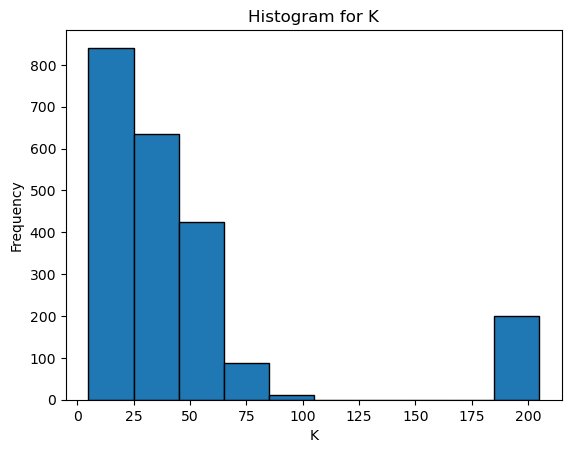

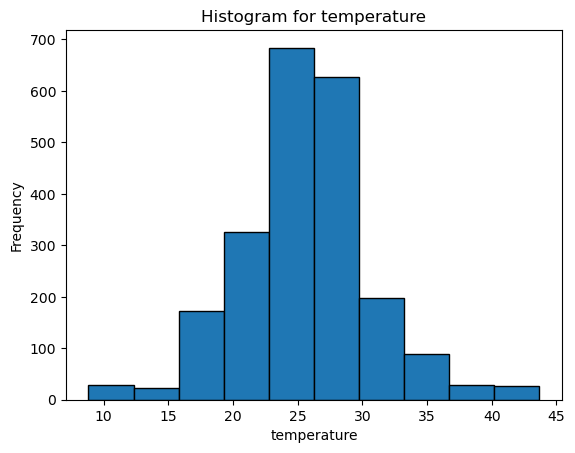

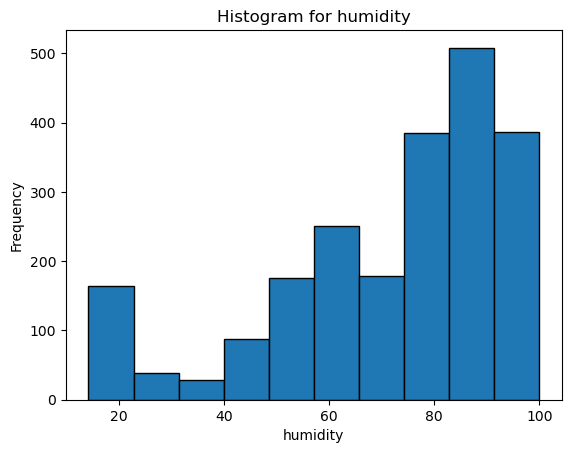

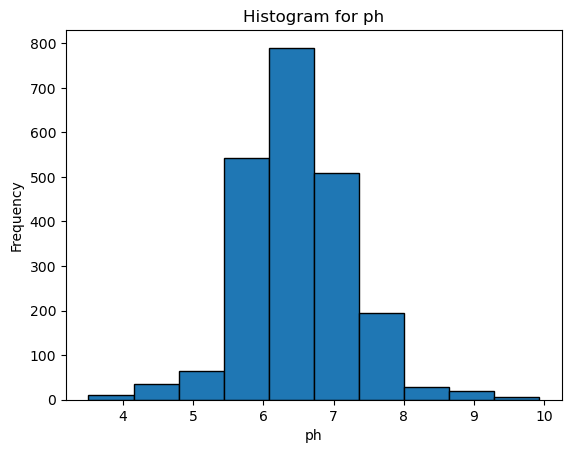

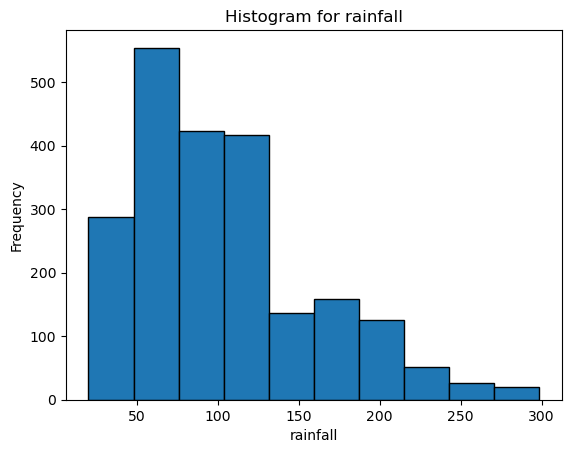

In [93]:
columns = data_num.columns
for i in columns:
    plt.hist(data_num[i], bins=10, edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Histogram for ' + i)
    plt.show()

##### Bivariante Analysis

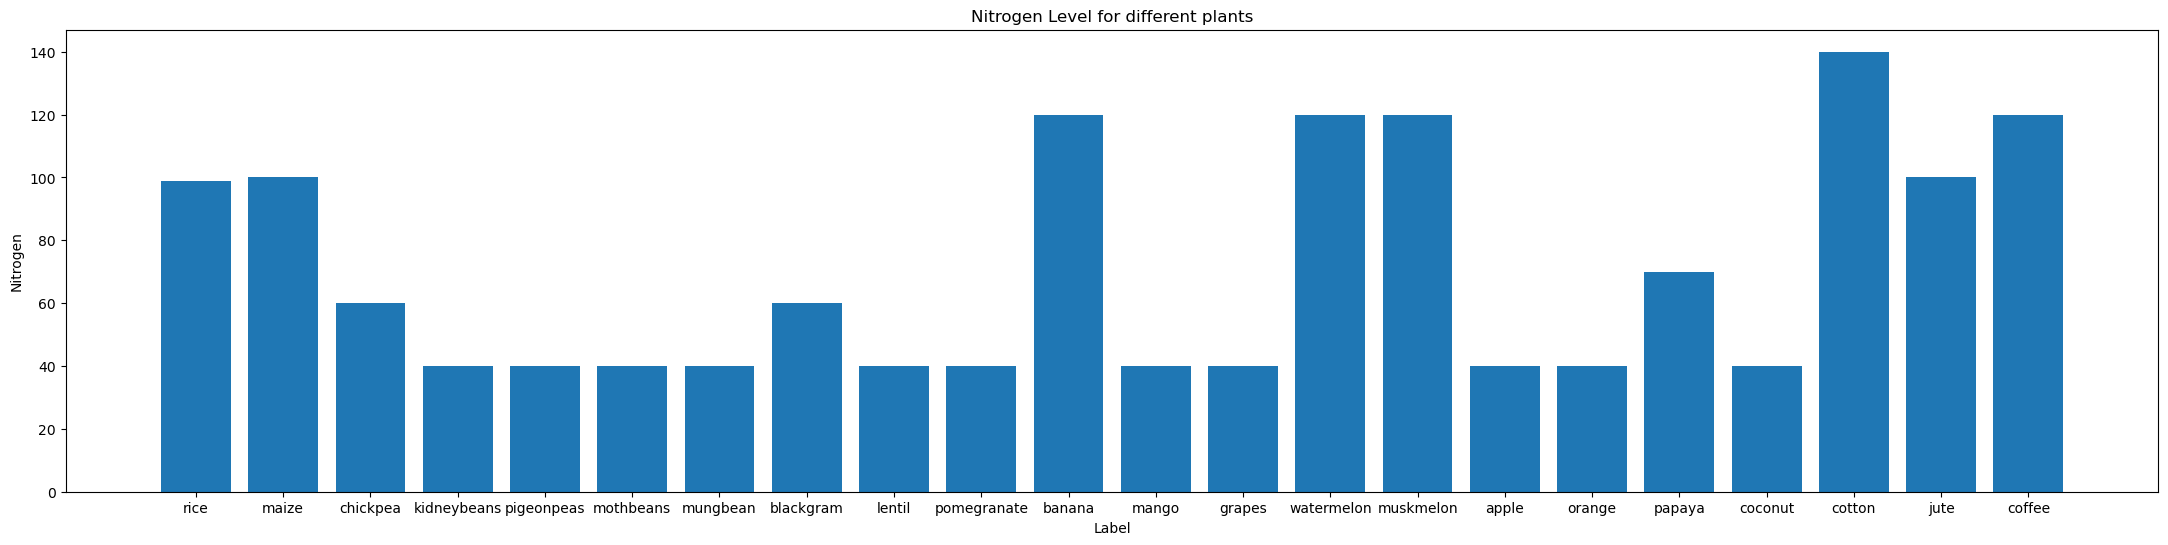

In [94]:
#plt size
plt.figure(figsize=(27, 6))
# Create a bar chart
plt.bar(data_cat['label'], data_num['N'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Nitrogen')
plt.title('Nitrogen Level for different plants')

# Display the chart
plt.show()

In [95]:
# Create a DataFrame
df_bins = pd.DataFrame(columns=['N_bin', 'P_bin', 'K_bin'])

# Create bins for nitrogen levels
bins = [0, 20, 40, 60, 80, 100, 120, 140]  # Define your own bin edges
df_bins['N_bin'] = pd.cut(data_num['N'], bins=bins, labels=['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140'])

# Create a contingency table
label_N = pd.crosstab(data_cat['label'], df_bins['N_bin'])
label_N

N_bin        <20  20-40  40-60  60-80  80-100  100-120  120-140
label                                                          
apple         42     55      0      0       0        0        0
banana         0      0      0      3      47       50        0
blackgram      5     43     52      0       0        0        0
chickpea       2     52     46      0       0        0        0
coconut       38     58      0      0       0        0        0
coffee         0      0      0      3      44       53        0
cotton         0      0      0      0       5       52       43
grapes        40     59      0      0       0        0        0
jute           0      0      4     51      45        0        0
kidneybeans   44     54      0      0       0        0        0
lentil        51     45      0      0       0        0        0
maize          0      0      5     57      38        0        0
mango         46     51      0      0       0        0        0
mothbeans     41     58      0      0       0        0        0
mungbean      44     55      0      0       0        0        0
muskmelon      0      0      0      2      49       49        0
orange        53     43      0      0       0        0        0
papaya         0     31     46     23       0        0        0
pigeonpeas    50     49      0      0       0        0        0
pomegranate   53     44      0      0       0        0        0
rice           0      0      7     43      50        0        0
watermelon     0      0      0      2      51       47        0

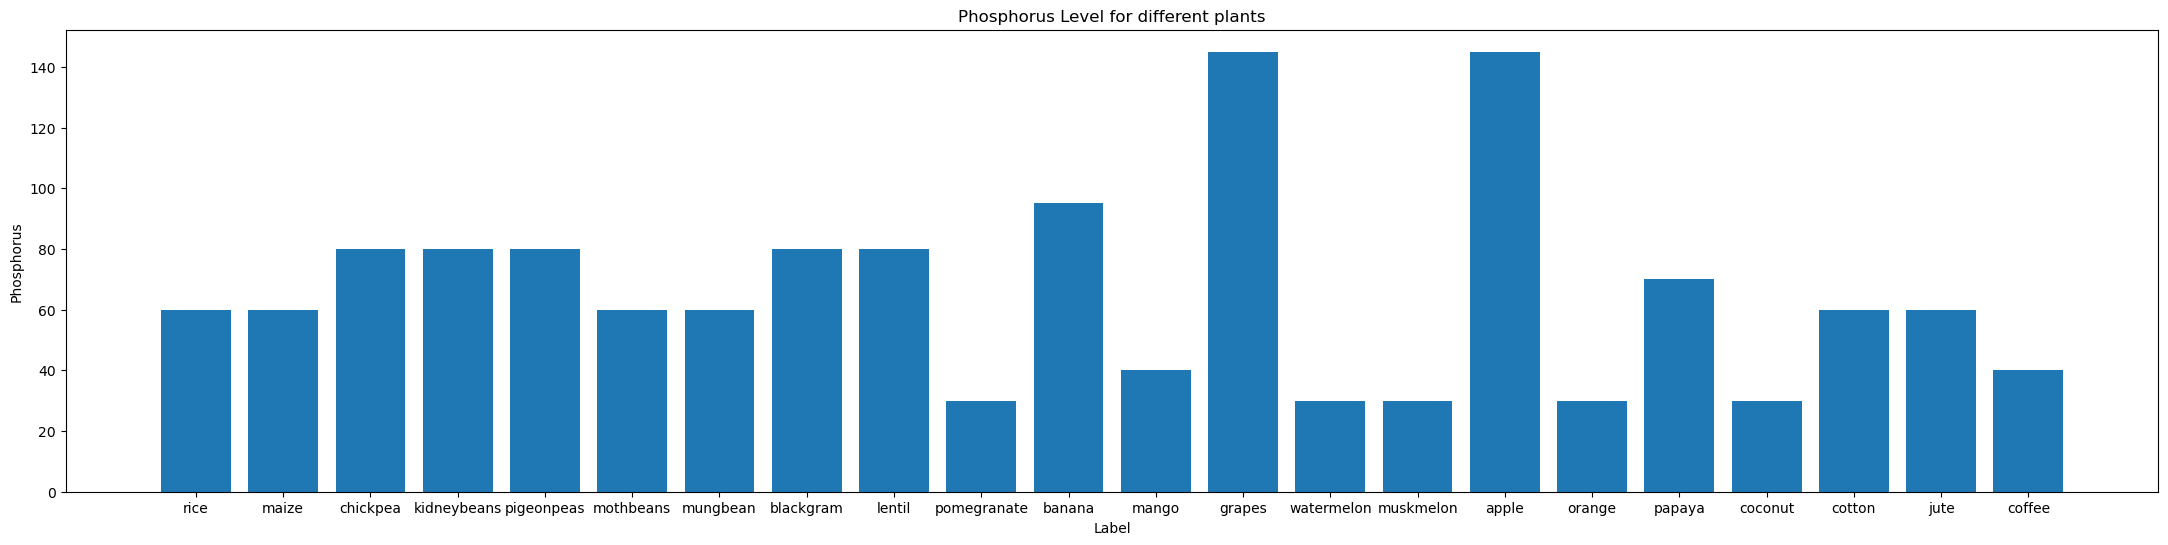

In [96]:
#plt size
plt.figure(figsize=(27, 6))
# Create a bar chart
plt.bar(data_cat['label'], data_num['P'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Phosphorus')
plt.title('Phosphorus Level for different plants')

# Display the chart
plt.show()

In [97]:
df_bins['P_bin'] = pd.cut(data_num['P'], bins=bins, labels=['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140'])

# Create a contingency table
label_P = pd.crosstab(data_cat['label'], df_bins['P_bin'])
label_P

P_bin        <20  20-40  40-60  60-80  80-100  100-120  120-140
label                                                          
apple          0      0      0      0       0        4       68
banana         0      0      0     46      54        0        0
blackgram      0      0     18     82       0        0        0
chickpea       0      0     23     77       0        0        0
coconut       63     37      0      0       0        0        0
coffee        15     85      0      0       0        0        0
cotton         0     30     70      0       0        0        0
grapes         0      0      0      0       0        6       78
jute           0     24     76      0       0        0        0
kidneybeans    0      0     23     77       0        0        0
lentil         0      0     18     82       0        0        0
maize          0     21     79      0       0        0        0
mango         28     72      0      0       0        0        0
mothbeans      0     19     81      0       0        0        0
mungbean       0     27     73      0       0        0        0
muskmelon     58     42      0      0       0        0        0
orange        65     35      0      0       0        0        0
papaya         0      0     53     47       0        0        0
pigeonpeas     0      0     23     77       0        0        0
pomegranate   51     49      0      0       0        0        0
rice           0     24     76      0       0        0        0
watermelon    60     40      0      0       0        0        0

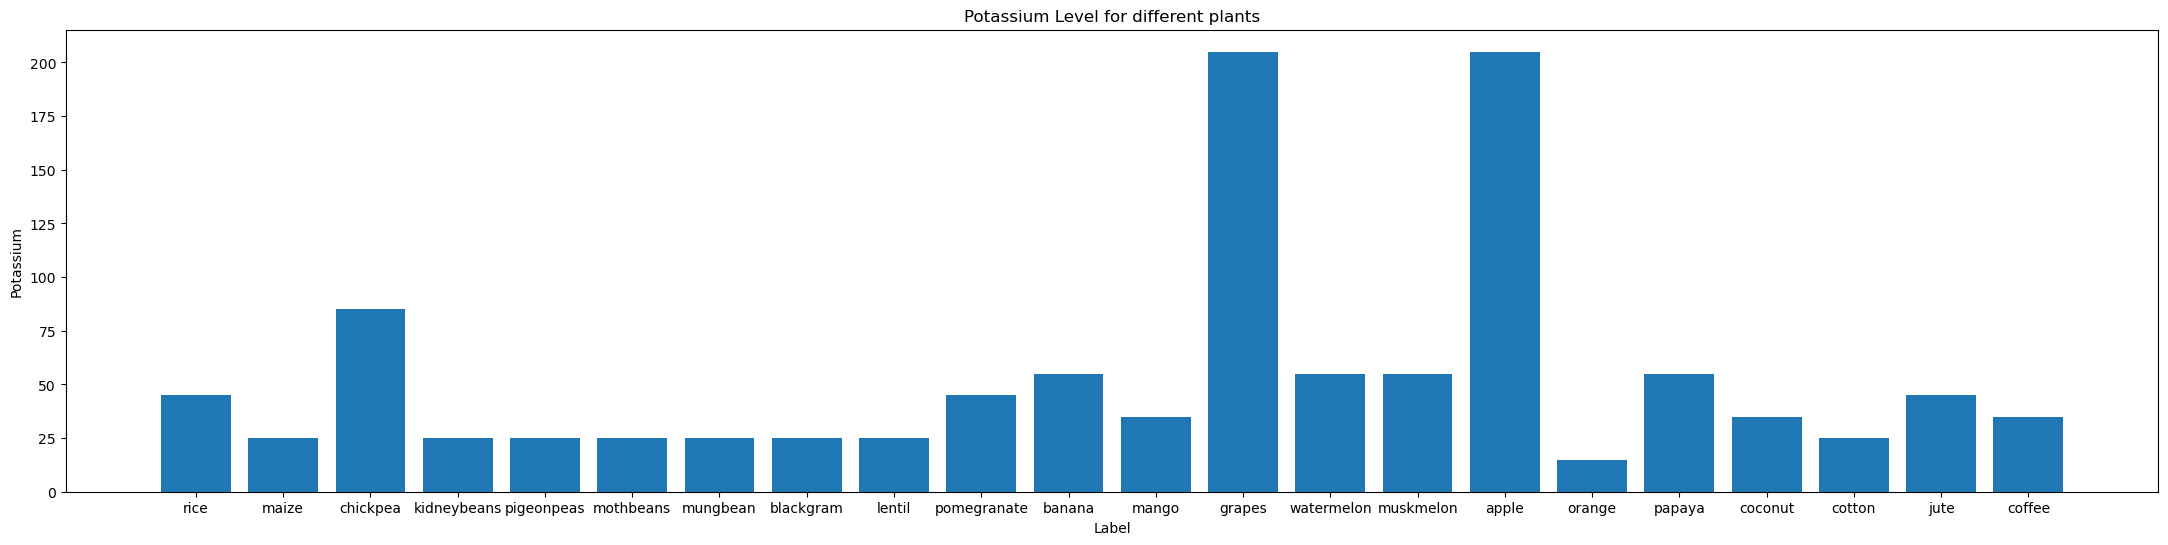

In [98]:
#plt size
plt.figure(figsize=(27, 6))
# Create a bar chart
plt.bar(data_cat['label'], data_num['K'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Potassium')
plt.title('Potassium Level for different plants')

# Display the chart
plt.show()

In [99]:
df_bins['K_bin'] = pd.cut(data_num['K'], bins=bins, labels=['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140'])

# Create a contingency table
label_K = pd.crosstab(data_cat['label'], df_bins['K_bin'])
label_K

K_bin        <20  20-40  40-60  60-80  80-100
label                                        
banana         0      0    100      0       0
blackgram     62     38      0      0       0
chickpea       0      0      0     56      44
coconut        0    100      0      0       0
coffee         0    100      0      0       0
cotton        64     36      0      0       0
jute           0     55     45      0       0
kidneybeans   54     46      0      0       0
lentil        61     39      0      0       0
maize         56     44      0      0       0
mango          0    100      0      0       0
mothbeans     53     47      0      0       0
mungbean      54     46      0      0       0
muskmelon      0      0    100      0       0
orange       100      0      0      0       0
papaya         0      0    100      0       0
pigeonpeas    54     46      0      0       0
pomegranate    0     51     49      0       0
rice           0     57     43      0       0
watermelon     0      0    100      0       0

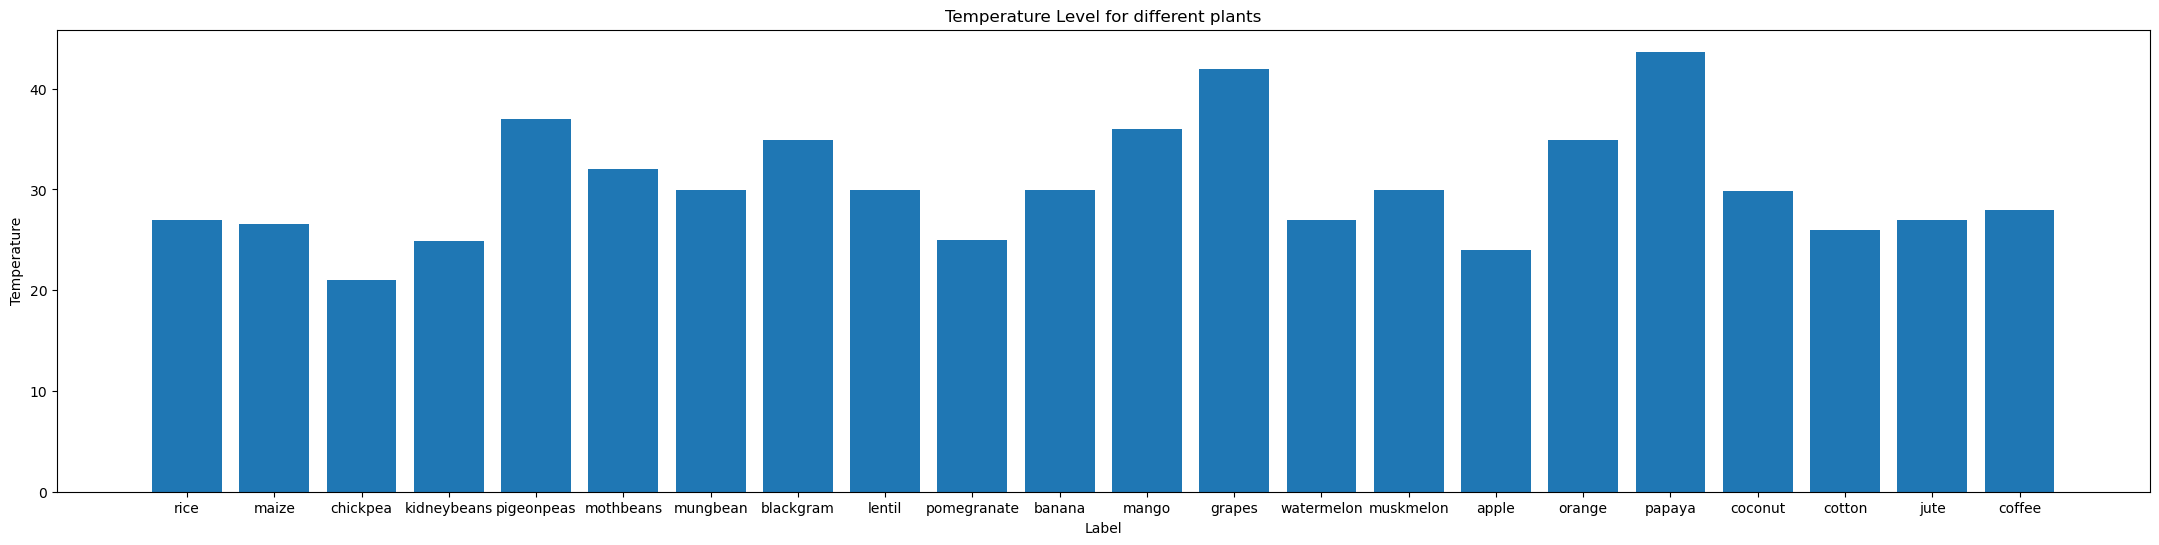

In [100]:
#plt size
plt.figure(figsize=(27, 6))
# Create a bar chart
plt.bar(data_cat['label'], data_num['temperature'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Temperature')
plt.title('Temperature Level for different plants')

# Display the chart
plt.show()

In [101]:
df_bins['temp_bin'] = pd.cut(data_num['temperature'], bins=bins, labels=['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140'])

# Create a contingency table
label_temp = pd.crosstab(data_cat['label'], df_bins['temp_bin'])
label_temp

temp_bin     <20  20-40  40-60
label                         
apple          0    100      0
banana         0    100      0
blackgram      0    100      0
chickpea      79     21      0
coconut        0    100      0
coffee         0    100      0
cotton         0    100      0
grapes        41     53      6
jute           0    100      0
kidneybeans   51     49      0
lentil        11     89      0
maize         27     73      0
mango          0    100      0
mothbeans      0    100      0
mungbean       0    100      0
muskmelon      0    100      0
orange        36     64      0
papaya         0     78     22
pigeonpeas    16     84      0
pomegranate   30     70      0
rice           0    100      0
watermelon     0    100      0

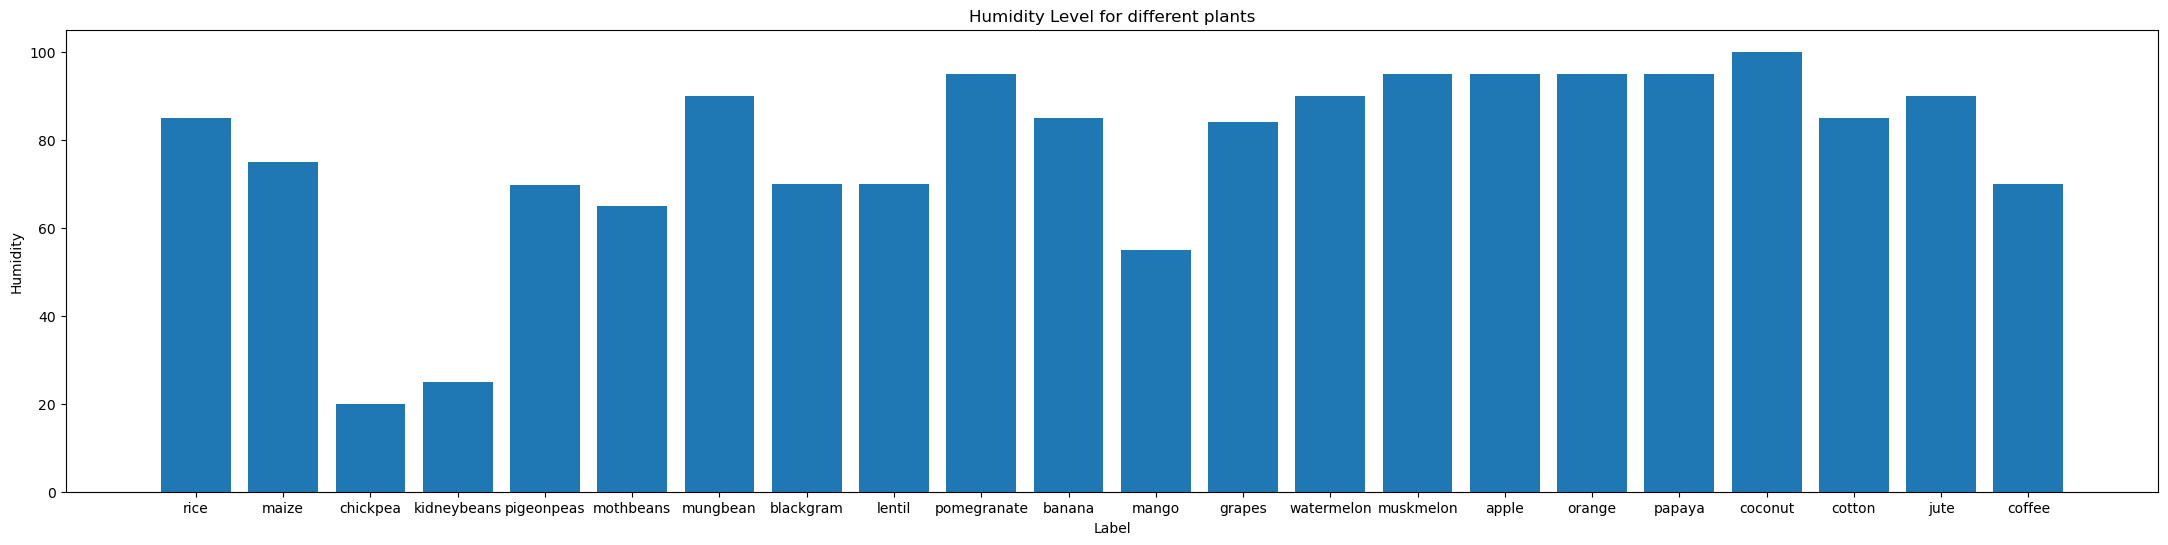

In [102]:
#plt size
plt.figure(figsize=(27, 6))
# Create a bar chart
plt.bar(data_cat['label'], data_num['humidity'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Humidity')
plt.title('Humidity Level for different plants')

# Display the chart
plt.show()

In [103]:
df_bins['humidity_bin'] = pd.cut(data_num['humidity'], bins=bins, labels=['<20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140'])

# Create a contingency table
label_humidity = pd.crosstab(data_cat['label'], df_bins['humidity_bin'])
label_humidity

humidity_bin  <20  20-40  40-60  60-80  80-100
label                                         
apple           0      0      0      0     100
banana          0      0      0     46      54
blackgram       0      0      0    100       0
chickpea      100      0      0      0       0
coconut         0      0      0      0     100
coffee          0      0     58     42       0
cotton          0      0      0     50      50
grapes          0      0      0      0     100
jute            0      0      0     54      46
kidneybeans    28     72      0      0       0
lentil          0      0      0    100       0
maize           0      0     21     79       0
mango           0      0    100      0       0
mothbeans       0      0     78     22       0
mungbean        0      0      0      0     100
muskmelon       0      0      0      0     100
orange          0      0      0      0     100
papaya          0      0      0      0     100
pigeonpeas      0     30     53     17       0
pomegranate     0      0      0      0     100
rice            0      0      0      0     100
watermelon      0      0      0      0     100

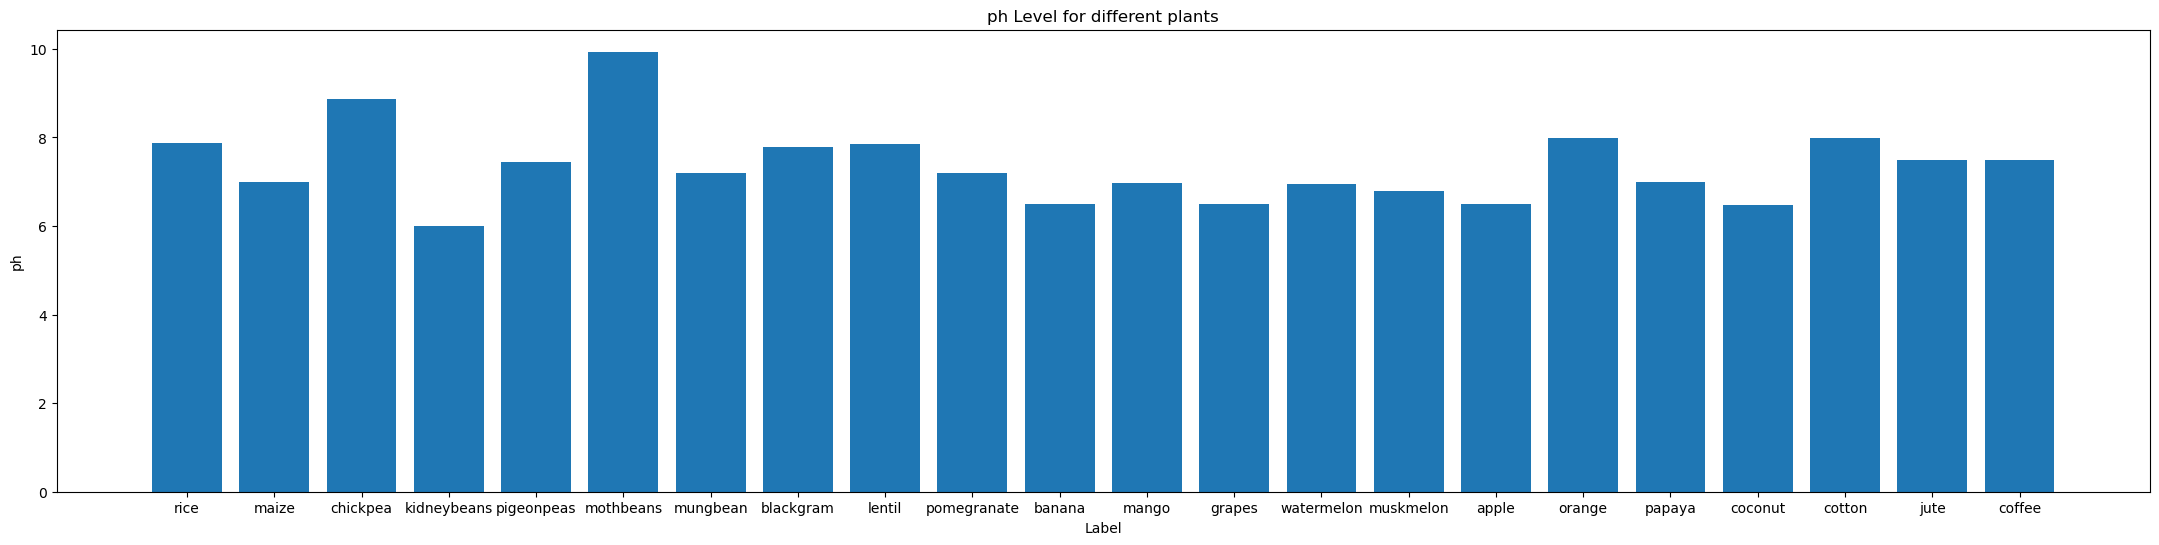

In [104]:
#plt size
plt.figure(figsize=(27, 6))
# Create a bar chart
plt.bar(data_cat['label'], data_num['ph'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('ph')
plt.title('ph Level for different plants')

# Display the chart
plt.show()

In [105]:
# Define bin edges and labels for pH levels
bins = [0, 5, 10, 15, 20]  # Adjust the bin edges as needed
labels = ['0-5', '5-10', '10-15', '15-20']

# Create a new column 'ph_bins' using pd.cut()
df_bins['ph_bins'] = pd.cut(data_num['ph'], bins=bins, labels=labels)

# Create a contingency table
label_ph = pd.crosstab(data_cat['label'], df_bins['ph_bins'])
label_ph

ph_bins      0-5  5-10
label                 
apple          0   100
banana         0   100
blackgram      0   100
chickpea       0   100
coconut        0   100
coffee         0   100
cotton         0   100
grapes         0   100
jute           0   100
kidneybeans    0   100
lentil         0   100
maize          0   100
mango         18    82
mothbeans     20    80
mungbean       0   100
muskmelon      0   100
orange         0   100
papaya         0   100
pigeonpeas    24    76
pomegranate    0   100
rice           0   100
watermelon     0   100

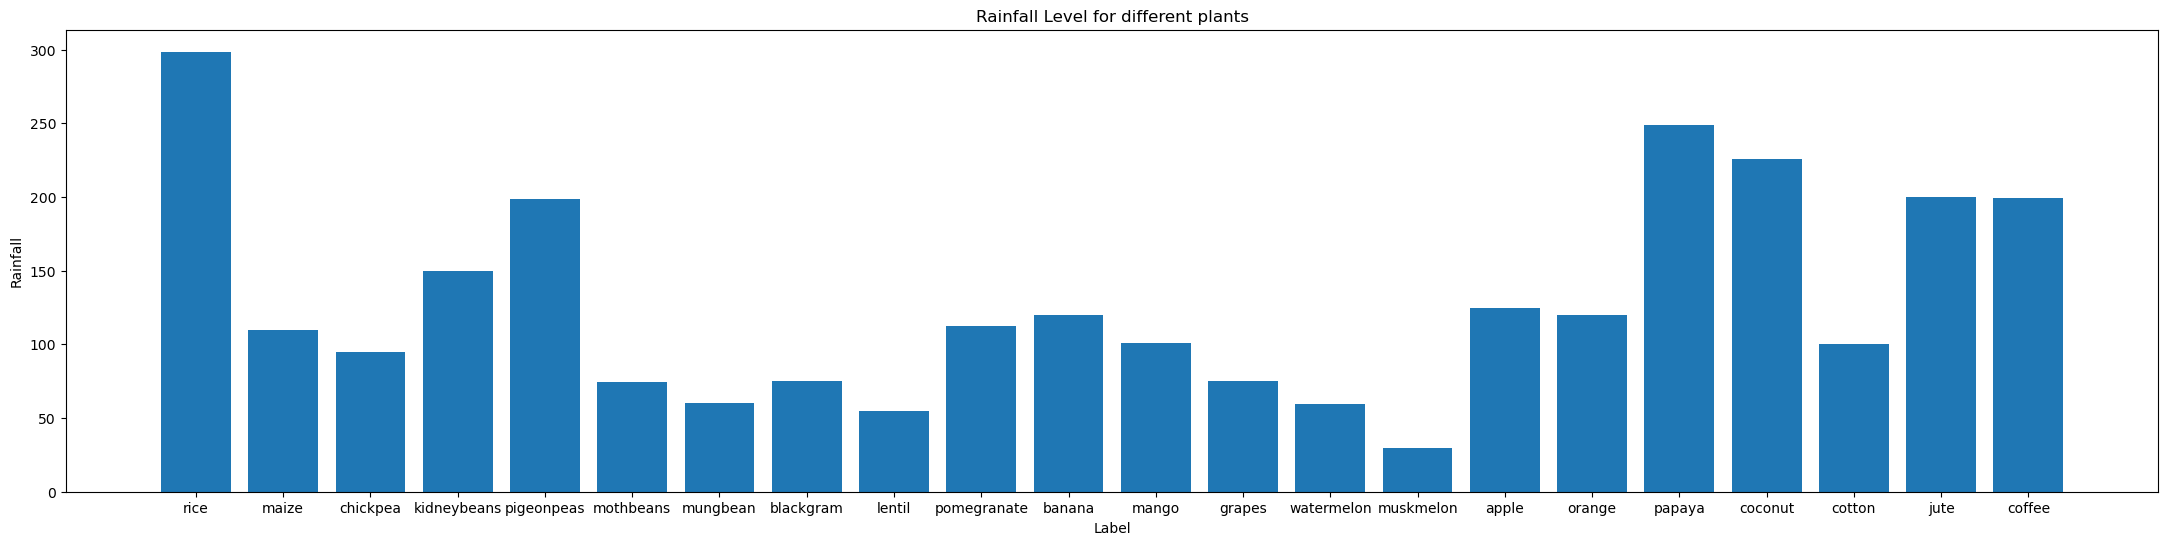

In [106]:
#plt size
plt.figure(figsize=(27, 6))
# Create a bar chart
plt.bar(data_cat['label'], data_num['rainfall'])

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Rainfall')
plt.title('Rainfall Level for different plants')

# Display the chart
plt.show()

In [107]:
# Define bin edges and labels for rainfall levels
bins = [0, 50, 100, 200, 250, 300]  # Adjust the bin edges as needed
labels = ['0-50', '50-100', '100-200', '200-250', '250-300']  # Use n-1 labels for n edges

# Create a new column 'rainfall_bins' using pd.cut()
df_bins['rainfall_bins'] = pd.cut(data_num['rainfall'], bins=bins, labels=labels)

# Create a contingency table
label_rainfall = pd.crosstab(data_cat['label'], df_bins['rainfall_bins'])
label_rainfall

rainfall_bins  0-50  50-100  100-200  200-250  250-300
label                                                 
apple             0       0      100        0        0
banana            0      38       62        0        0
blackgram         0     100        0        0        0
chickpea          0     100        0        0        0
coconut           0       0       74       26        0
coffee            0       0      100        0        0
cotton            0     100        0        0        0
grapes            0     100        0        0        0
jute              0       0      100        0        0
kidneybeans       0      38       62        0        0
lentil           75      25        0        0        0
maize             0      75       25        0        0
mango             0      94        6        0        0
mothbeans        48      52        0        0        0
mungbean         54      46        0        0        0
muskmelon       100       0        0        0        0
orange            0       0      100        0        0
papaya            5      28       41       26        0
pigeonpeas        0       9       91        0        0
pomegranate       0       0      100        0        0
rice              0       0       20       42       38
watermelon       49      51        0        0        0

##### Multivariate Analysis

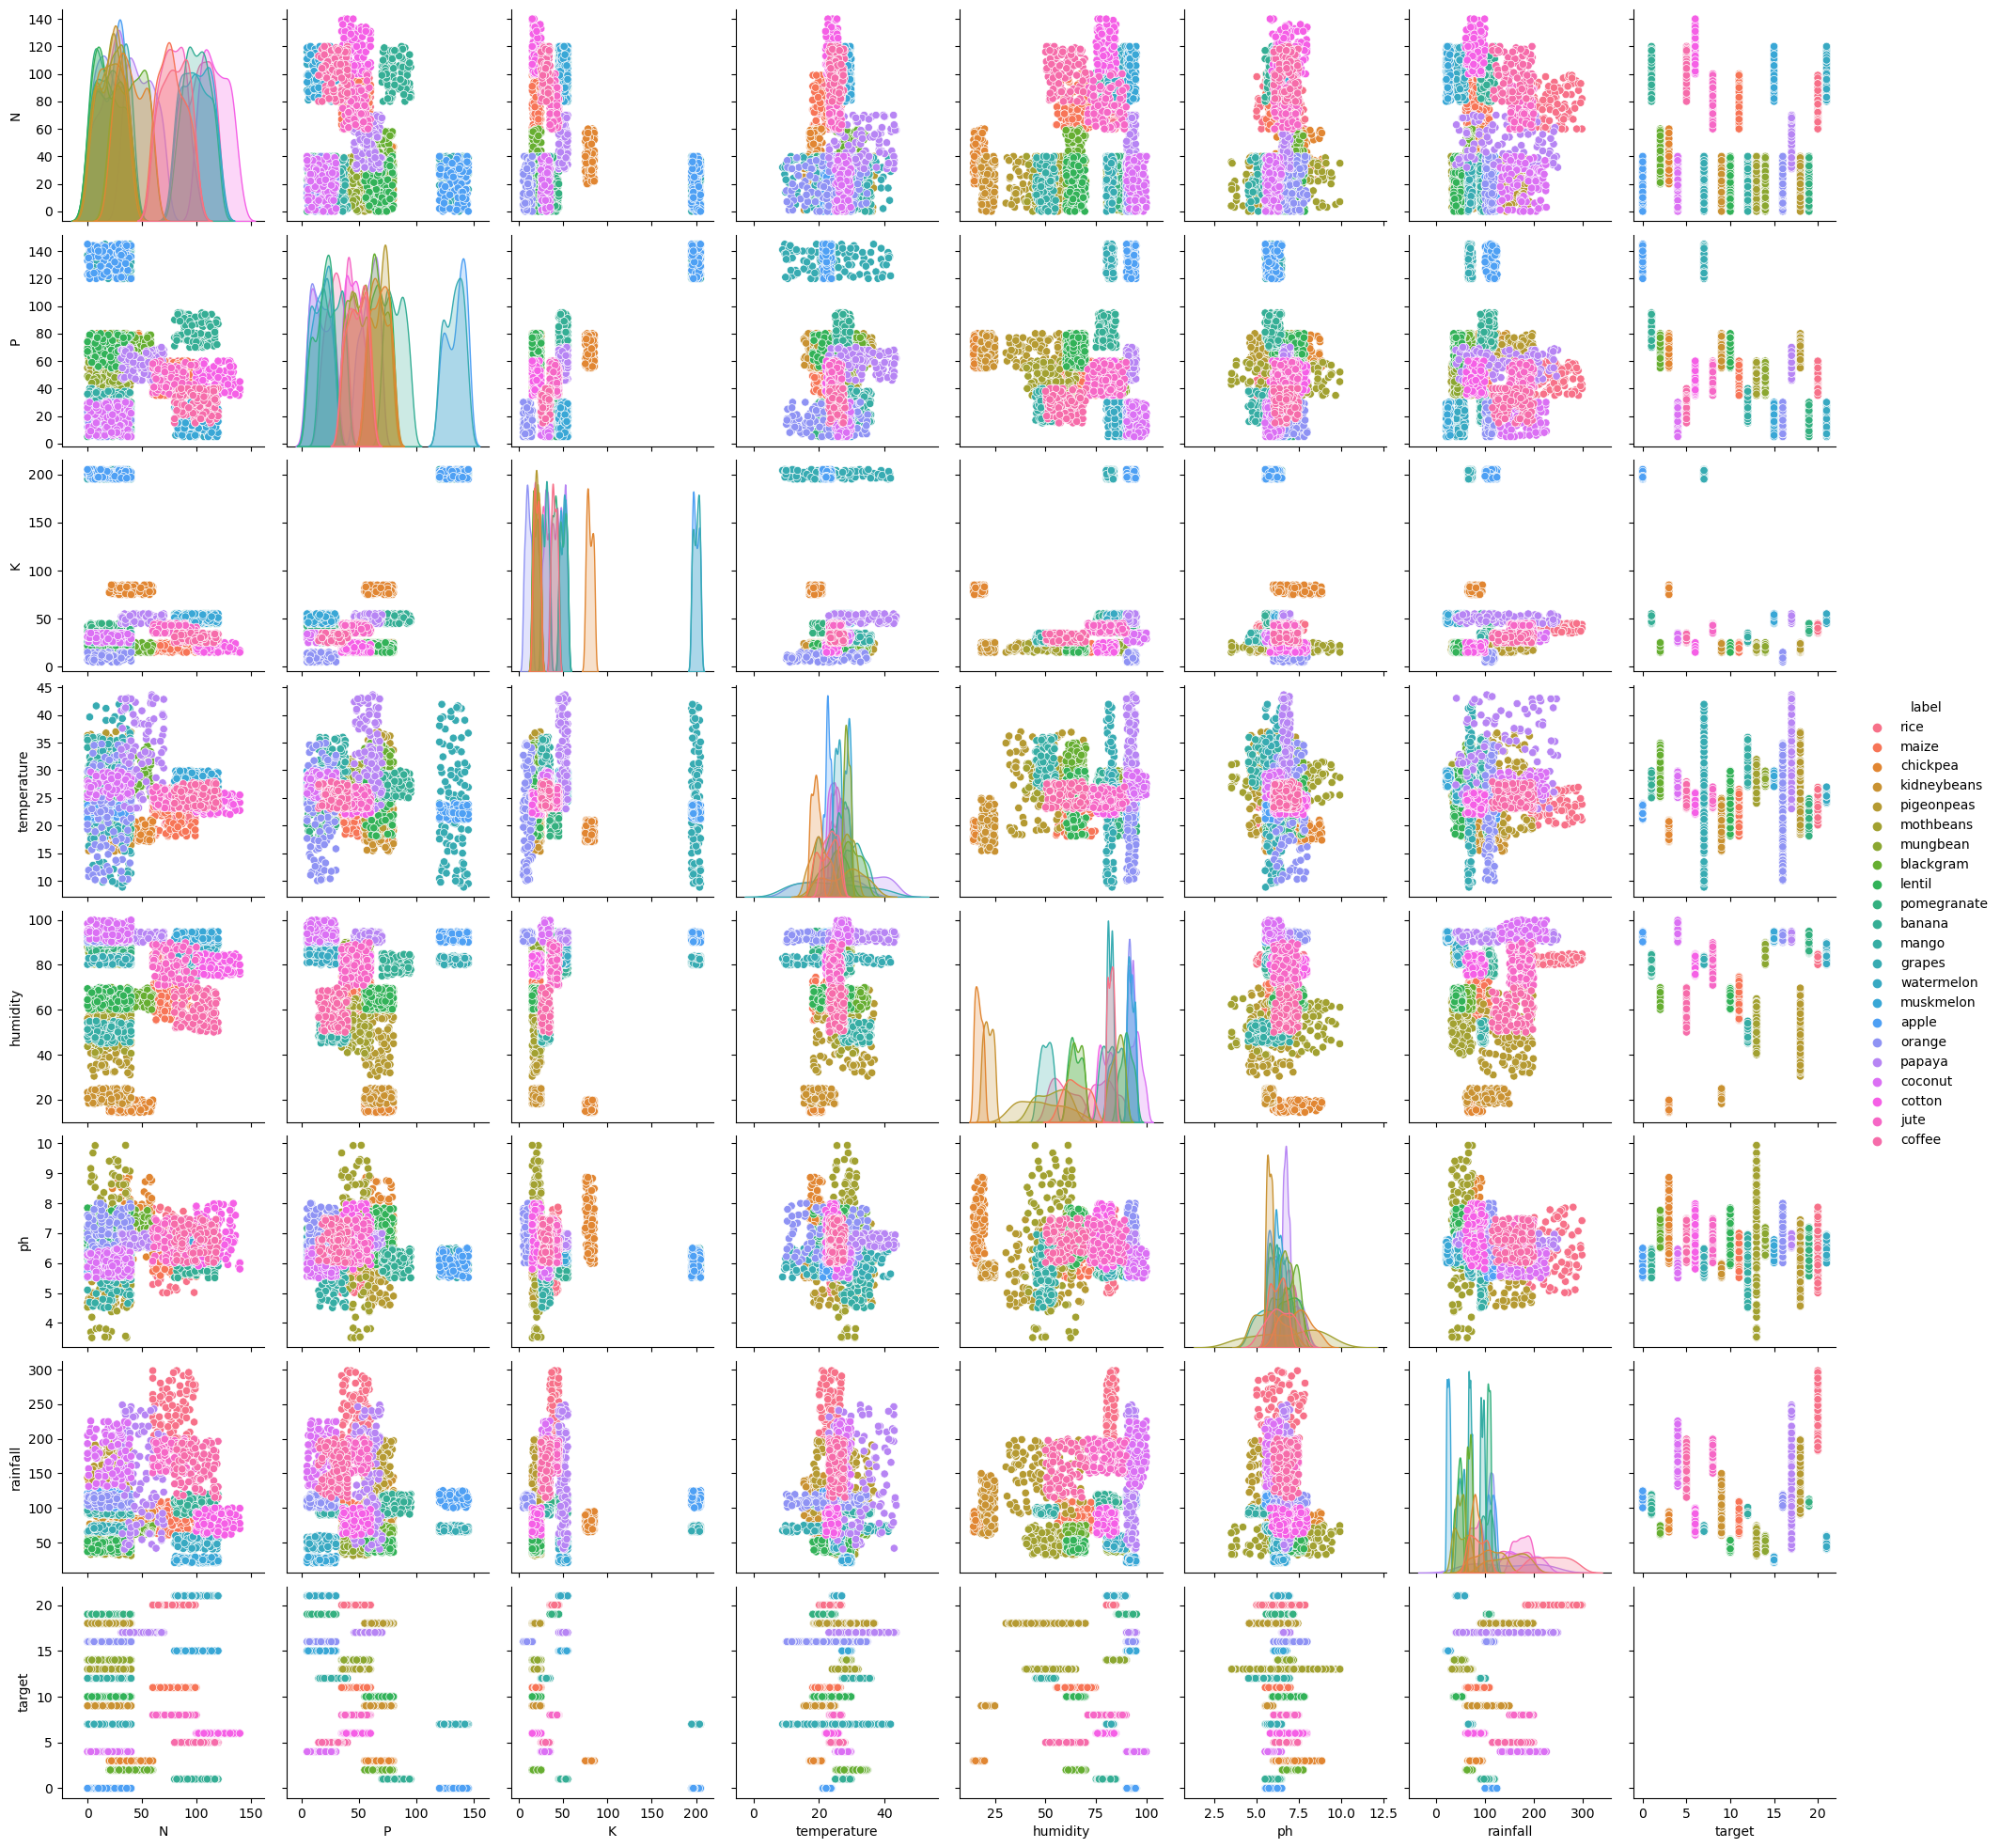

In [108]:
#pairplot
sns.pairplot(data, hue = 'label' )

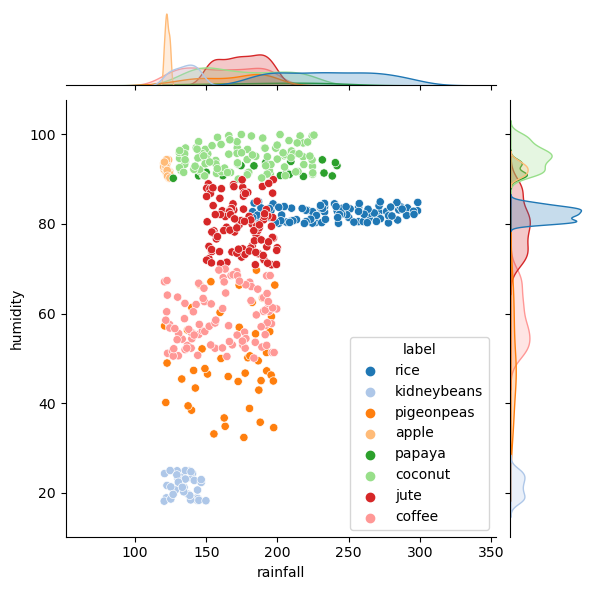

In [109]:
#jointplot for rainfall and Humidity for plant preference
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<30) & (data['rainfall']>120)],hue="label")

During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season.
 
 1. Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
 
 
 2. Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

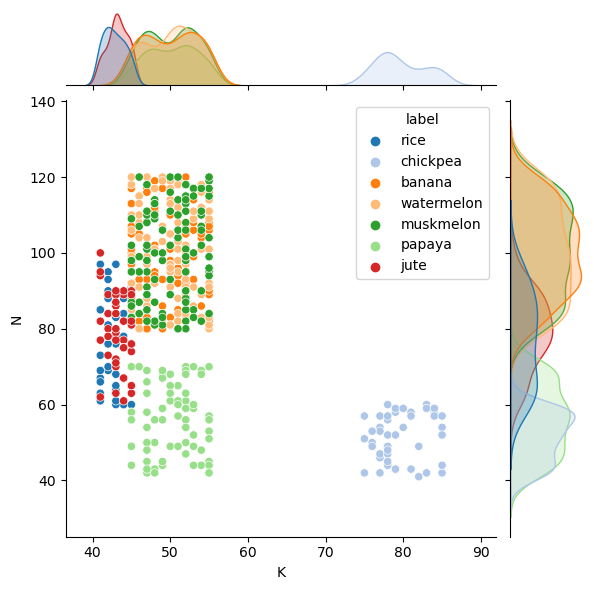

In [110]:
#jointplot for potassium and Nitrogen for plant preference 
sns.jointplot(x="K",y="N",data=data[(data['N']>40)&(data['K']>40)],hue="label")

This graph correlates with average potassium (K) and average nitrogen (N) value (both>50).

These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.

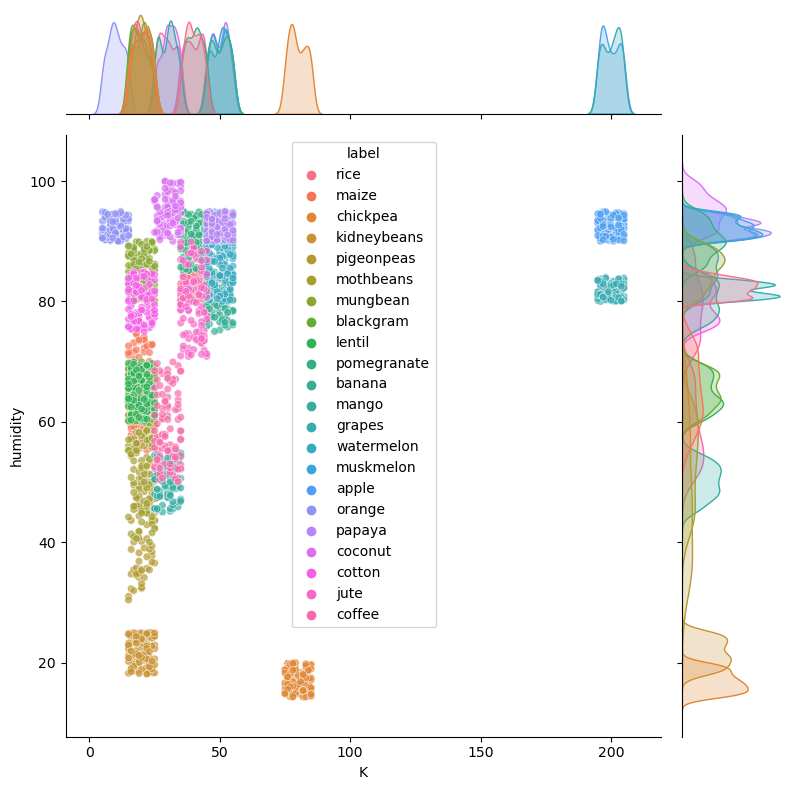

In [111]:
#joint plot for pottasium and Humidity for plant preference
sns.jointplot(x="K",y="humidity",data=data,hue='label',size=8,s=30,alpha=0.7)

<AxesSubplot:xlabel='ph', ylabel='label'>

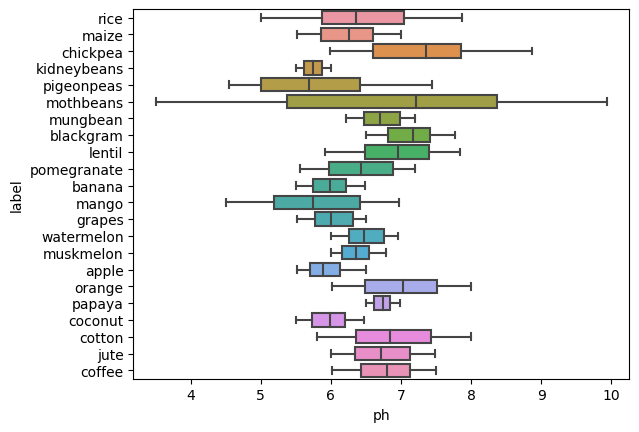

In [112]:
#balnced level ph value for plants
sns.boxplot(y='label',x='ph',data=data)

We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<AxesSubplot:xlabel='P', ylabel='label'>

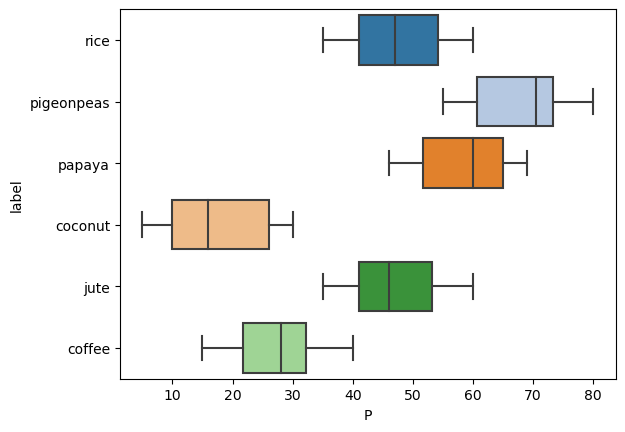

In [113]:
#balnced level Phosphorous value for plants
sns.boxplot(y='label',x='P',data=data[data['rainfall']>150])

Another interesting analysis where Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

<AxesSubplot:xlabel='K', ylabel='rainfall'>

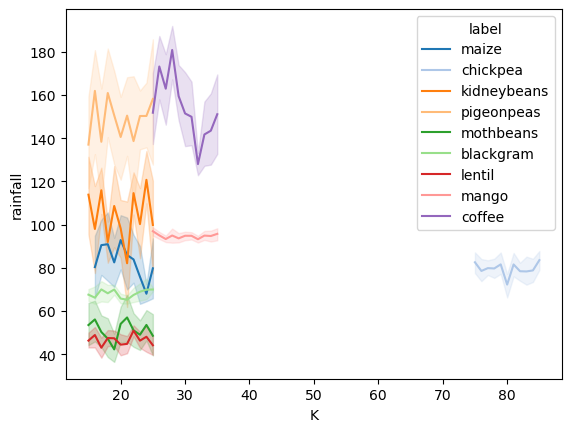

In [114]:
sns.lineplot(data = data[(data['humidity']<65)], x = "K", y = "rainfall",hue="label")

In [115]:
data_num.corr()

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

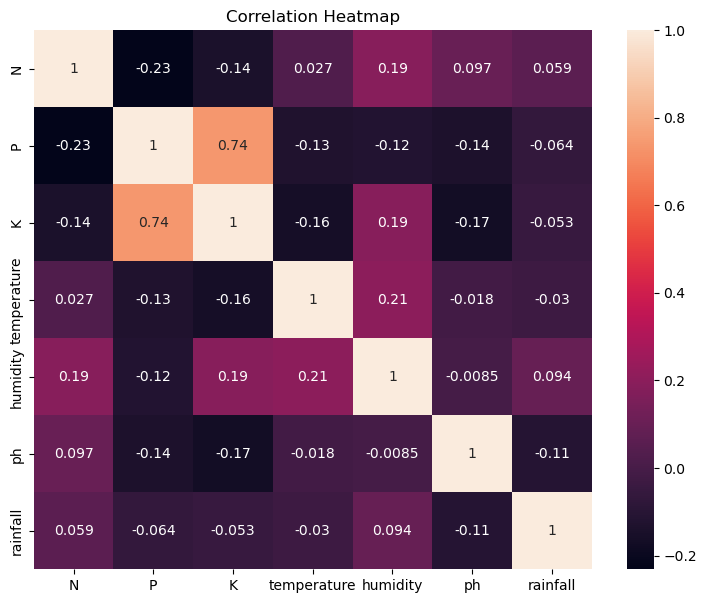

In [116]:
correlation_matrix = data_num.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

##### Balanced data or Not

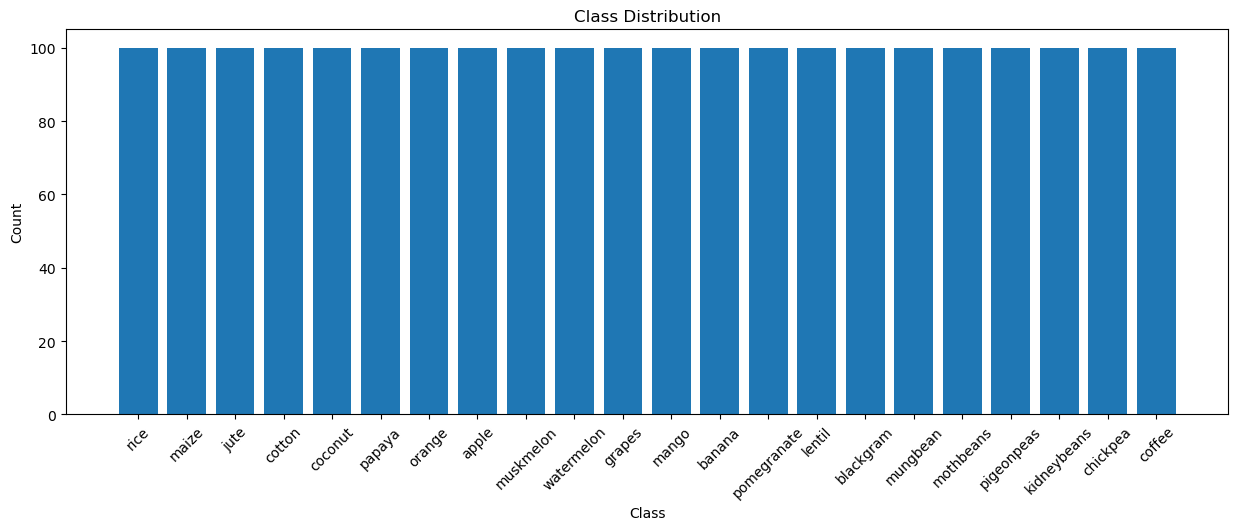

In [117]:
# Calculate class counts
class_counts = data['label'].value_counts()

# Set a color palette
sns.set_palette("tab20") 

# Create a bar plot
plt.figure(figsize=(15, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Data is Balnced DataSet

##### Train and Test Data

In [118]:
#encoding the multiclass label
c=data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
targets

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [119]:
data['target']=c.cat.codes
data[['label','target']].head()

label  target
0  rice      20
1  rice      20
2  rice      20
3  rice      20
4  rice      20

In [120]:
for i in range(0, 21):
    code = i
    category = targets[code]
    print(f"The category corresponding to code {code} is {category}")

The category corresponding to code 0 is apple
The category corresponding to code 1 is banana
The category corresponding to code 2 is blackgram
The category corresponding to code 3 is chickpea
The category corresponding to code 4 is coconut
The category corresponding to code 5 is coffee
The category corresponding to code 6 is cotton
The category corresponding to code 7 is grapes
The category corresponding to code 8 is jute
The category corresponding to code 9 is kidneybeans
The category corresponding to code 10 is lentil
The category corresponding to code 11 is maize
The category corresponding to code 12 is mango
The category corresponding to code 13 is mothbeans
The category corresponding to code 14 is mungbean
The category corresponding to code 15 is muskmelon
The category corresponding to code 16 is orange
The category corresponding to code 17 is papaya
The category corresponding to code 18 is pigeonpeas
The category corresponding to code 19 is pomegranate
The category corresponding 

In [121]:
data

N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      target  
0         20  
1         20  
2         20  
3         20  
4         20  
...      ...  
2195       5  
2196       5  
2197       5  
2198       5  
2199       5  

[2200 rows x 9 columns]

In [122]:
X = data_num
y = data['target']

In [123]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [124]:
#shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1540, 7), (660, 7), (1540,), (660,))

##### Model_1 (DecisionTree Classifier)

In [125]:
#creating an instance
DT = DecisionTreeClassifier()

#fitting the model
DT.fit(X_train, y_train)

#prediction
DT_train_pred = DT.predict(X_train)
DT_test_pred = DT.predict(X_test)

In [127]:
#confusion matrix
mat_DT=confusion_matrix(y_test,DT.predict(X_test))
df_cm_DT = pd.DataFrame(mat_DT, list(targets.values()), list(targets.values()))
df_cm_DT

apple  banana  blackgram  chickpea  coconut  coffee  cotton  \
apple           34       0          0         0        0       0       0   
banana           0      26          0         0        0       0       0   
blackgram        0       0         26         0        0       0       0   
chickpea         0       0          0        33        0       0       0   
coconut          0       0          0         0       33       0       0   
coffee           0       0          0         0        0      30       0   
cotton           0       0          0         0        0       0      28   
grapes           0       0          0         0        0       0       0   
jute             0       0          0         0        0       0       1   
kidneybeans      0       0          0         0        0       0       0   
lentil           0       0          0         0        0       0       0   
maize            0       0          0         0        0       0       0   
mango            0       0          0         0        0       0       0   
mothbeans        0       0          2         0        0       0       0   
mungbean         0       0          0         0        0       0       0   
muskmelon        0       0          0         0        0       0       0   
orange           0       0          0         0        0       0       0   
papaya           0       0          0         0        0       0       0   
pigeonpeas       0       0          0         0        0       0       0   
pomegranate      0       0          0         0        0       0       0   
rice             0       0          0         0        0       0       0   
watermelon       0       0          0         0        0       0       0   

             grapes  jute  kidneybeans  ...  mango  mothbeans  mungbean  \
apple             0     0            0  ...      0          0         0   
banana            0     0            0  ...      0          0         0   
blackgram         0     0            0  ...      0          0         0   
chickpea          0     0            0  ...      0          0         0   
coconut           0     0            0  ...      0          0         0   
coffee            0     0            0  ...      0          0         0   
cotton            0     0            0  ...      0          0         0   
grapes           23     0            0  ...      0          0         0   
jute              0    32            0  ...      0          0         0   
kidneybeans       0     0           36  ...      0          0         0   
lentil            0     0            0  ...      0          0         0   
maize             0     0            0  ...      0          0         0   
mango             0     0            0  ...     32          0         0   
mothbeans         0     0            0  ...      0         31         0   
mungbean          0     0            0  ...      0          0        30   
muskmelon         0     0            0  ...      0          0         0   
orange            0     0            0  ...      0          0         0   
papaya            0     0            0  ...      0          0         1   
pigeonpeas        0     0            0  ...      0          0         0   
pomegranate       0     0            0  ...      0          0         0   
rice              0     4            0  ...      0          0         0   
watermelon        0     0            0  ...      0          0         0   

             muskmelon  orange  papaya  pigeonpeas  pomegranate  rice  \
apple                0       0       0           0            0     0   
banana               0       0       0           0            0     0   
blackgram            0       0       0           0            0     0   
chickpea             0       0       0           0            0     0   
coconut              0       0       0           0            0     0   
coffee               0       0       0           0            0     0   
cotton               0     

In [128]:
#accuracy
DT_Train_accuracy = DT.score(X_train, y_train)
DT_Test_accuracy = DT.score(X_test, y_test)

print('DT_Train_accuracy :', DT_Train_accuracy)
print('DT_Test_accuracy :', DT_Test_accuracy)

DT_Train_accuracy : 1.0
DT_Test_accuracy : 0.9833333333333333


##### Model_2(Random Forest Classifier)

In [137]:
#creating an instance
RF = RandomForestClassifier()

#fitting the model
RF.fit(X_train, y_train)

#prediction
RF_train_pred = RF.predict(X_train)
RF_test_pred = RF.predict(X_test)

In [138]:
#confusion matrix
mat_RF=confusion_matrix(y_test,RF.predict(X_test))
df_cm_RF = pd.DataFrame(mat_RF, list(targets.values()), list(targets.values()))
df_cm_RF

apple  banana  blackgram  chickpea  coconut  coffee  cotton  \
apple           34       0          0         0        0       0       0   
banana           0      26          0         0        0       0       0   
blackgram        0       0         26         0        0       0       0   
chickpea         0       0          0        34        0       0       0   
coconut          0       0          0         0       33       0       0   
coffee           0       0          0         0        0      30       0   
cotton           0       0          0         0        0       0      28   
grapes           0       0          0         0        0       0       0   
jute             0       0          0         0        0       0       0   
kidneybeans      0       0          0         0        0       0       0   
lentil           0       0          0         0        0       0       0   
maize            0       0          0         0        0       0       0   
mango            0       0          0         0        0       0       0   
mothbeans        0       0          0         0        0       0       0   
mungbean         0       0          0         0        0       0       0   
muskmelon        0       0          0         0        0       0       0   
orange           0       0          0         0        0       0       0   
papaya           0       0          0         0        0       0       0   
pigeonpeas       0       0          0         0        0       0       0   
pomegranate      0       0          0         0        0       0       0   
rice             0       0          0         0        0       0       0   
watermelon       0       0          0         0        0       0       0   

             grapes  jute  kidneybeans  ...  mango  mothbeans  mungbean  \
apple             0     0            0  ...      0          0         0   
banana            0     0            0  ...      0          0         0   
blackgram         0     0            0  ...      0          0         0   
chickpea          0     0            0  ...      0          0         0   
coconut           0     0            0  ...      0          0         0   
coffee            0     0            0  ...      0          0         0   
cotton            0     0            0  ...      0          0         0   
grapes           23     0            0  ...      0          0         0   
jute              0    34            0  ...      0          0         0   
kidneybeans       0     0           36  ...      0          0         0   
lentil            0     0            0  ...      0          0         0   
maize             0     0            0  ...      0          0         0   
mango             0     0            0  ...     32          0         0   
mothbeans         0     0            0  ...      0         34         0   
mungbean          0     0            0  ...      0          0        30   
muskmelon         0     0            0  ...      0          0         0   
orange            0     0            0  ...      0          0         0   
papaya            0     0            0  ...      0          0         0   
pigeonpeas        0     0            0  ...      0          0         0   
pomegranate       0     0            0  ...      0          0         0   
rice              0     5            0  ...      0          0         0   
watermelon        0     0            0  ...      0          0         0   

             muskmelon  orange  papaya  pigeonpeas  pomegranate  rice  \
apple                0       0       0           0            0     0   
banana               0       0       0           0            0     0   
blackgram            0       0       0           0            0     0   
chickpea             0       0       0           0            0     0   
coconut              0       0       0           0            0     0   
coffee               0       0       0           0            0     0   
cotton               0     

In [139]:
#accuracy
RF_Train_accuracy = RF.score(X_train, y_train)
RF_Test_accuracy = RF.score(X_test, y_test)

print('RF_Train_accuracy :', RF_Train_accuracy)
print('RF_Test_accuracy :', RF_Test_accuracy)

RF_Train_accuracy : 1.0
RF_Test_accuracy : 0.9924242424242424


##### Model_3(Gradient Boosting Classifier)

In [152]:
#creating an instance
GBC = GradientBoostingClassifier()

#fitting the model
GBC.fit(X_train, y_train)

#prediction
GBC_train_pred = GBC.predict(X_train)
GBC_test_pred = GBC.predict(X_test)

In [153]:
#confusion matrix
mat_GBC=confusion_matrix(y_test,GBC.predict(X_test))
df_cm_GBC = pd.DataFrame(mat_GBC, list(targets.values()), list(targets.values()))
df_cm_GBC

apple  banana  blackgram  chickpea  coconut  coffee  cotton  \
apple           34       0          0         0        0       0       0   
banana           0      26          0         0        0       0       0   
blackgram        0       0         26         0        0       0       0   
chickpea         0       0          0        34        0       0       0   
coconut          0       0          0         0       33       0       0   
coffee           0       0          0         0        0      30       0   
cotton           0       0          0         0        0       0      28   
grapes           0       0          0         0        0       0       0   
jute             0       0          0         0        0       0       0   
kidneybeans      0       0          0         0        0       0       0   
lentil           0       0          0         0        0       0       0   
maize            0       0          0         0        0       0       1   
mango            0       0          0         0        0       0       0   
mothbeans        0       0          0         0        0       0       0   
mungbean         0       0          0         0        0       0       0   
muskmelon        0       0          0         0        0       0       0   
orange           0       0          0         0        0       0       0   
papaya           0       0          0         0        0       0       0   
pigeonpeas       0       0          1         0        0       0       0   
pomegranate      0       0          0         0        0       0       0   
rice             0       0          0         0        0       0       0   
watermelon       0       0          0         0        0       0       0   

             grapes  jute  kidneybeans  ...  mango  mothbeans  mungbean  \
apple             0     0            0  ...      0          0         0   
banana            0     0            0  ...      0          0         0   
blackgram         0     0            0  ...      0          0         0   
chickpea          0     0            0  ...      0          0         0   
coconut           0     0            0  ...      0          0         0   
coffee            0     0            0  ...      0          0         0   
cotton            0     0            0  ...      0          0         0   
grapes           23     0            0  ...      0          0         0   
jute              0    33            0  ...      0          0         0   
kidneybeans       0     0           36  ...      0          0         0   
lentil            0     0            0  ...      0          0         0   
maize             0     0            0  ...      0          0         0   
mango             0     0            0  ...     32          0         0   
mothbeans         0     0            0  ...      0         33         0   
mungbean          0     0            0  ...      0          0        30   
muskmelon         0     0            0  ...      0          0         0   
orange            0     0            0  ...      0          0         0   
papaya            0     0            0  ...      0          0         0   
pigeonpeas        0     0            0  ...      1          0         0   
pomegranate       0     0            0  ...      0          0         0   
rice              0     6            0  ...      0          0         0   
watermelon        0     0            0  ...      0          0         0   

             muskmelon  orange  papaya  pigeonpeas  pomegranate  rice  \
apple                0       0       0           0            0     0   
banana               0       0       0           0            0     0   
blackgram            0       0       0           0            0     0   
chickpea             0       0       0           0            0     0   
coconut              0       0       0           0            0     0   
coffee               0       0       0           0            0     0   
cotton               0     

In [154]:
#accuracy
GBC_Train_accuracy = GBC.score(X_train, y_train)
GBC_Test_accuracy = GBC.score(X_test, y_test)

print('GBC_Train_accuracy :', GBC_Train_accuracy)
print('GBC_Test_accuracy :', GBC_Test_accuracy)

GBC_Train_accuracy : 1.0
GBC_Test_accuracy : 0.9833333333333333


##### Model_4 (KNN_Classifier)

In [155]:
#scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [156]:
#Creating an instance
Knn = KNeighborsClassifier()

#Fitting the data
Knn.fit(X_train_scaled, y_train)

#prediction
Knn_train_pred = Knn.predict(X_train_scaled)
Knn_test_pred = Knn.predict(X_test_scaled)

In [157]:
#confusion matrix
mat_Knn=confusion_matrix(y_test,Knn.predict(X_test_scaled))
df_cm_Knn = pd.DataFrame(mat_Knn, list(targets.values()), list(targets.values()))
df_cm_Knn

apple  banana  blackgram  chickpea  coconut  coffee  cotton  \
apple           34       0          0         0        0       0       0   
banana           0      26          0         0        0       0       0   
blackgram        0       0         25         0        0       0       0   
chickpea         0       0          0        34        0       0       0   
coconut          0       0          0         0       33       0       0   
coffee           0       0          0         0        0      29       0   
cotton           0       0          0         0        0       0      28   
grapes           0       0          0         0        0       0       0   
jute             0       0          0         0        0       0       0   
kidneybeans      0       0          0         0        0       0       0   
lentil           0       0          0         0        0       0       0   
maize            0       0          0         0        0       0       0   
mango            0       0          0         0        0       0       0   
mothbeans        0       0          0         0        0       0       0   
mungbean         0       0          0         0        0       0       0   
muskmelon        0       0          0         0        0       0       0   
orange           0       0          0         0        0       0       0   
papaya           0       0          0         0        0       0       0   
pigeonpeas       0       0          2         0        0       0       0   
pomegranate      0       0          0         0        0       0       0   
rice             0       0          0         0        0       0       0   
watermelon       0       0          0         0        0       0       0   

             grapes  jute  kidneybeans  ...  mango  mothbeans  mungbean  \
apple             0     0            0  ...      0          0         0   
banana            0     0            0  ...      0          0         0   
blackgram         0     0            0  ...      0          0         0   
chickpea          0     0            0  ...      0          0         0   
coconut           0     0            0  ...      0          0         0   
coffee            0     1            0  ...      0          0         0   
cotton            0     0            0  ...      0          0         0   
grapes           23     0            0  ...      0          0         0   
jute              0    34            0  ...      0          0         0   
kidneybeans       0     0           36  ...      0          0         0   
lentil            0     0            0  ...      0          0         0   
maize             0     0            0  ...      0          0         0   
mango             0     0            0  ...     32          0         0   
mothbeans         0     0            0  ...      0         31         0   
mungbean          0     0            0  ...      0          0        30   
muskmelon         0     0            0  ...      0          0         0   
orange            0     0            0  ...      0          0         0   
papaya            0     0            0  ...      0          0         0   
pigeonpeas        0     0            2  ...      0          0         0   
pomegranate       0     0            0  ...      0          0         0   
rice              0     8            0  ...      0          0         0   
watermelon        0     0            0  ...      0          0         0   

             muskmelon  orange  papaya  pigeonpeas  pomegranate  rice  \
apple                0       0       0           0            0     0   
banana               0       0       0           0            0     0   
blackgram            0       0       0           0            0     0   
chickpea             0       0       0           0            0     0   
coconut              0       0       0           0            0     0   
coffee               0       0       0           0            0     0   
cotton               0     

In [158]:
#accuracy
Knn_Train_accuracy = Knn.score(X_train_scaled, y_train)
Knn_Test_accuracy = Knn.score(X_test_scaled, y_test)

print('Knn_Train_accuracy :', Knn_Train_accuracy)
print('Knn_Test_accuracy :', Knn_Test_accuracy)

Knn_Train_accuracy : 0.9889610389610389
Knn_Test_accuracy : 0.9742424242424242


##### Accuracy Comparision

In [159]:
#Creatinga a dataframe for accuracies of all models
df_acc = pd.DataFrame(columns = ['Train_accuracy', 'Test_accuracy'])

#model names
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors']

# Assign the accuracy values to the DataFrame
df_acc.at['Decision Tree', 'Train_accuracy'] = DT_Train_accuracy
df_acc.at['Decision Tree', 'Test_accuracy'] = DT_Test_accuracy

df_acc.at['Random Forest', 'Train_accuracy'] = RF_Train_accuracy
df_acc.at['Random Forest', 'Test_accuracy'] = RF_Test_accuracy

df_acc.at['Gradient Boosting', 'Train_accuracy'] = GBC_Train_accuracy
df_acc.at['Gradient Boosting', 'Test_accuracy'] = GBC_Test_accuracy

df_acc.at['K-Nearest Neighbors', 'Train_accuracy'] = Knn_Train_accuracy
df_acc.at['K-Nearest Neighbors', 'Test_accuracy'] = Knn_Test_accuracy
df_acc

Train_accuracy Test_accuracy
Decision Tree                  1.0      0.983333
Random Forest                  1.0      0.992424
Gradient Boosting              1.0      0.983333
K-Nearest Neighbors       0.988961      0.974242

**Hence choosing Random Forest Classifier as the best Model for our DataSet**

##### Pickle File

In [160]:
import pickle

# Save the trained model as a pickle file
with open('Crop_recommender_model.pkl', 'wb') as f:
    pickle.dump(RF, f)